# AutoEncoder for Cifar dataset

## Importing Standard Libraries

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

from livelossplot import PlotLossesKeras

## EDA

### Reading The Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


### Normalizing The Dataset And Converting to Grayscale



In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train[:,:,:,0]
x_test = x_test[:,:,:,0]

In [4]:
print('Training Shape:', x_train.shape)
print('Number of train samples:', x_train.shape[0])
print('Number of test samples:', x_test.shape[0])

Training Shape: (50000, 32, 32)
Number of train samples: 50000
Number of test samples: 10000


### Splitting The Test Dataset into Validation and Test set

In [5]:
x_val = x_test[:7000]
x_test = x_test[7000:]
print("Validation Data Shape: {0} \nTest Data Shape: {1}".format(x_val.shape, x_test.shape))

Validation Data Shape: (7000, 32, 32) 
Test Data Shape: (3000, 32, 32)


## AutoEncoder

### Building The AutoEncoder

In [6]:
input_img = Input(shape=(32, 32))

#Encoding
x = Dense(128, activation = 'relu')(input_img)
x = Dense(64, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
encoded = Dense(8, activation = 'relu')(x)

# Decoding
x = Dense(8, activation = 'relu')(encoded)
x = Dense(16, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
decoded = Dense(32, activation = 'sigmoid')(x)

In [7]:
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

### Running The AutoEncoder

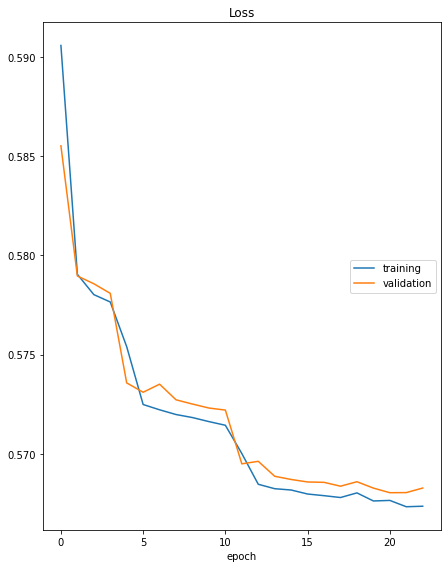

Loss
	training         	 (min:    0.567, max:    0.591, cur:    0.567)
	validation       	 (min:    0.568, max:    0.586, cur:    0.568)
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5674 - val_loss: 0.5683
Epoch 00023: early stopping


In [8]:
batch_size = 32
num_classes = 10
epochs = 100
es = EarlyStopping(monitor = 'val_loss', patience = 2, verbose = 1, mode = 'auto')
chkpt = 'AutoEncoder_Cifar10_Deep_weights.hdf5'
mc = ModelCheckpoint(filepath = chkpt, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

history = model.fit(x_train, x_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_val, x_val), 
                    callbacks = [es, mc, PlotLossesKeras()], shuffle = True)

### Checking The Score On Test Dataset

In [9]:
score = model.evaluate(x_test, x_test, verbose=1)
print(score)

94/94 [==============================] - 0s 5ms/step - loss: 0.5680
0.5680134296417236


### Encoding The Images and Seeing Them Side by Side with Original

In [10]:
c10test = model.predict(x_test)
c10val = model.predict(x_val)
print("Validation Dataset Score: {0}\nTest Dataset Score: {1}".format(np.average(c10val), np.average(c10test)))

Validation Dataset Score: 0.4953276515007019
Test Dataset Score: 0.4902627468109131


In [11]:
def showOrigDec(orig, dec, num=10):
  n = num 
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(orig[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(dec[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

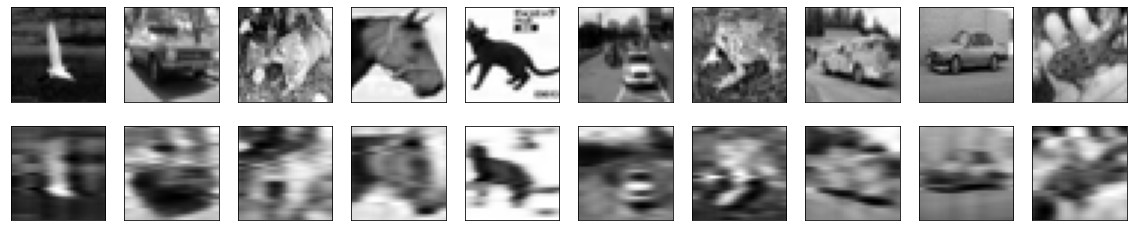

In [12]:
showOrigDec(x_test, c10test)

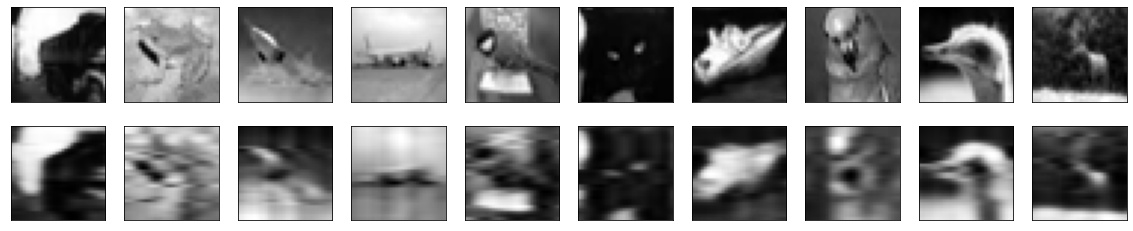

In [13]:
showOrigDec(x_test[100:], c10test[100:])

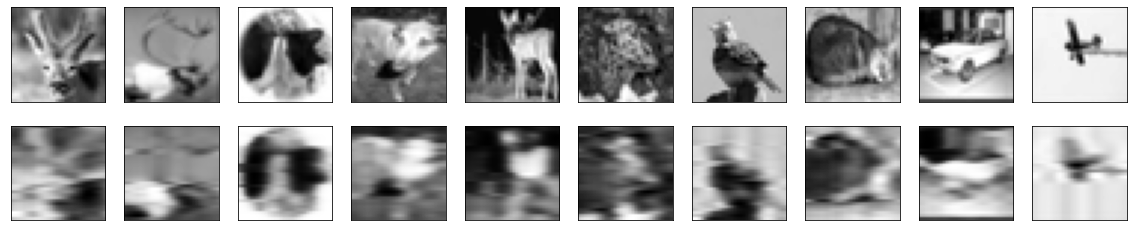

In [14]:
showOrigDec(x_test[200:], c10test[200:])